In [290]:
#!pip install torchmetrics
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import pandas as pd
import numpy as np
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
import pandas as pd
from torch.autograd import Variable
import numpy as np
import torch.functional as F
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
from   sklearn.decomposition import PCA
from   sklearn import linear_model
import matplotlib.pyplot as plt                   # постороение графиков
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, TensorDataset
import torchmetrics

In [291]:
# Читаем файл с компетенциями
df = pd.read_excel('/content/DatasetHS_L_4_16_diff_4_COLAB.xlsx')

In [292]:
df['SKILLS'] = df['SKILLS'].astype(str)

# Длинна каждого посчитаем длинну
df['list_of_skill'] = df['SKILLS'].apply(lambda x: x.split(','))

In [293]:
df['cnt_skill'] = df['list_of_skill'].apply(lambda x: len(x))

In [294]:
df.head(5)

,SKILLS,list_of_skill,cnt_skill
0,НАВЫКИ КООРДИНАЦИИ И ОПЕРАТИВНОГО ПЛАНИРОВАНИЯ...,[НАВЫКИ КООРДИНАЦИИ И ОПЕРАТИВНОГО ПЛАНИРОВАНИ...,16
1,"1C БУХГАЛТЕРИЯ,1C ЗАРПЛАТА И КАДРЫ,БАНК КЛИЕНТ...","[1C БУХГАЛТЕРИЯ, 1C ЗАРПЛАТА И КАДРЫ, БАНК КЛИ...",16
2,"1C БУХГАЛТЕРИЯ,АТТЕСТАТ ПРОФЕССИОНАЛЬНОГО БУХГ...","[1C БУХГАЛТЕРИЯ, АТТЕСТАТ ПРОФЕССИОНАЛЬНОГО БУ...",16
3,"1C БУХГАЛТЕРИЯ,БУХГАЛТЕРСКИЙ УЧЕТ,БУХГАЛТЕРСКА...","[1C БУХГАЛТЕРИЯ, БУХГАЛТЕРСКИЙ УЧЕТ, БУХГАЛТЕР...",16
4,"1C БУХГАЛТЕРИЯ,РАБОТА С ПОСТАВЩИКАМИ,РАСЧЕТЫ С...","[1C БУХГАЛТЕРИЯ, РАБОТА С ПОСТАВЩИКАМИ, РАСЧЕТ...",16


In [295]:
df_skill = df[(df.cnt_skill > 3) & (df.cnt_skill < 17)]

In [296]:
data = df_skill

In [297]:
len(data)

66216

In [298]:
# Создаем словарь
vocabulary = []
vocabulary.append('[PAD]')
vocabulary.append('[MASK]')
for i, row  in data.iterrows():
    for j in data["list_of_skill"][i]:
        if j not in vocabulary:
            vocabulary.append(j)
word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}
vocabulary_size = len(vocabulary)

In [299]:
vocabulary_size

33640

In [300]:
from collections import Counter

# Создадим список всех слов в списке слов
all_words = [word for sublist in data.list_of_skill for word in sublist]

# Подсчитаем количество повторений каждого слова
word_counts = Counter(all_words)

# Выведем результат
print(word_counts)

Counter({'ПОЛЬЗОВАТЕЛЬ ПК': 10425, 'РАБОТА С БОЛЬШИМ ОБЪЕМОМ ИНФОРМАЦИИ': 6081, 'АНГЛИЙСКИЙ ЯЗЫК': 5491, 'АКТИВНЫЕ ПРОДАЖИ': 4636, '1С ПРЕДПРИЯТИЕ 8': 4355, 'ЗАКЛЮЧЕНИЕ ДОГОВОРОВ': 3840, 'ПОИСК И ПРИВЛЕЧЕНИЕ КЛИЕНТОВ': 3370, 'УПРАВЛЕНИЕ ПРОЕКТАМИ': 3352, 'AUTOCAD': 3038, 'MS POWERPOINT': 2857, 'SQL': 2755, 'EXCEL': 2580, 'ADOBE PHOTOSHOP': 2446, 'ВЕДЕНИЕ ОТЧЕТНОСТИ': 2375, 'GIT': 2333, 'B2B ПРОДАЖИ': 2317, 'ПОИСК ИНФОРМАЦИИ В ИНТЕРНЕТ': 2307, 'ВЫСШЕЕ ОБРАЗОВАНИЕ': 2274, 'РАБОТА С ОРГТЕХНИКОЙ': 2180, 'LINUX': 2159, 'ДОКУМЕНТООБОРОТ': 2143, 'CRM': 2114, 'ОПЫТНЫЙ ПОЛЬЗОВАТЕЛЬ ПК': 2034, 'УВЕРЕННЫЙ ПОЛЬЗОВАТЕЛЬ ПК': 2015, 'ОТВЕТСТВЕННОСТЬ И ПУНКТУАЛЬНОСТЬ': 1944, 'БУХГАЛТЕРСКАЯ ОТЧЕТНОСТЬ': 1940, 'ДОКУМЕНТАЛЬНОЕ СОПРОВОЖДЕНИЕ': 1908, '1С БУХГАЛТЕРИЯ': 1829, 'ХОЛОДНЫЕ ПРОДАЖИ': 1808, 'ПЕРВИЧНАЯ ДОКУМЕНТАЦИЯ': 1805, 'MS OUTLOOK': 1795, 'ПЕРВИЧНАЯ БУХГАЛТЕРСКАЯ ДОКУМЕНТАЦИЯ': 1780, 'MS EXCEL': 1776, 'УПРАВЛЕНИЕ ПРОДАЖАМИ': 1753, '1С ДОКУМЕНТООБОРОТ': 1744, 'ВЕДЕНИЕ КЛИЕНТСКОЙ БАЗЫ': 1714, 'PY

In [301]:
from collections import Counter

# Создадим список всех слов в списке слов
all_words = [word for sublist in data.list_of_skill for word in sublist]

# Подсчитаем количество повторений каждого слова
word_counts = Counter(all_words)

# Получим список слов, которые встречаются всего один раз
unique_words = [word for word, count in word_counts.items() if count == 1]

# Выведем результат
print(unique_words)

['НАВЫКИ КООРДИНАЦИИ И ОПЕРАТИВНОГО ПЛАНИРОВАНИЯ ДЕЯТЕЛЬНОСТИ', 'УМЕНИЕ ВЗАИМОДЕЙСТВОВАТЬ С ВЫСШИМ РУКОВОДСТВОМ', 'УМЕНИЕ ПРИНИМАТЬ РЕШЕНИЯ И ДОВОДИТЬ ИХ ДО ИСПОЛНЕНИЯ', 'ЗНАНИЯ КОНСТРУКЦИИ И УСТРОЙСТВА ЛОКОМОТИВОВ СЕРИИ ТЭМ18ДМ', 'ТЭМ7А', 'ЭП2К', 'ЧС 2', 'УМЕНИЕ ПОЛЬЗОВАТЬСЯ ПРОГРАММАМИ КАСАНТ', 'КАСАТ', 'АСУТ Т', 'АС РБ', 'XL 1С', 'НАВЫКИ РАБОТЫ С INTERNET И ЭЛЕКТРОННОЙ ПОЧТОЙ', 'ПРОДВИЖЕНИЕ БРЕНДА КОМПАНИИ', 'ДОРАБОТКА САЙТА КОМПАНИИ', 'РАБОТА С АНАЛИТИКОЙ', 'РИВЛЕЧЕНИЕ ЦЕЛЕВОЙ АУДИТОРИИ', 'УПРАВЛЕНИЕ РЕПУТАЦИЕЙ БРЕНДА', 'РАЗРАБОТКА МЕТОДОЛОГИИ БИЗНЕС ПРОЦЕССОВ', 'TELEGRAMM', '1С КОРП', '1С УТ10', '1С УТ11', 'KA 1C', '1C БП', 'ПРОГРАММЫ МICROSOFT', 'УДОСТОВЕРЕНИЕ С ПРАВОМ ИСПЫТАНИЯ ОБОРУДОВАНИЯ ПОВЫШЕННЫМ НАПРЯЖЕНИЕМ', 'ЭКСПЛУАТАЦИОННЫЕ ИСПЫТАНИЯ', '500 КВ', 'ЭЛЕКТРОУСТАНОВКИ 6 500 КВ', 'ЭЛЕКТРОСЕТИ', 'ПРОВЕДЕНИЕ ИСПЫТАНИЙ И ИЗМЕРЕНИЙ', 'МОСЭНЕРГО', 'МОСИНЖПРОЕКТ', '220КВ', '110КВ', 'IP АТС', 'REMOTE DESKTOP SERVICE', 'ОРГАНИЗАЦИЯ ВИДЕО КОНФЕРЕНЦСВЯЗИ', 'PIX4D MAPPER', 'CREDO 3D СКА

In [302]:
len(unique_words)

22844

In [303]:
## Преобразуйте объект Counter в DataFrame
#word_count_df = pd.DataFrame(list(word_counts.items()), columns=['Skill', 'Count'])

In [304]:
#word_count_df.to_excel('word_count_df.xlsx')

In [305]:
# Случайная сортировка списков
for index, row in data.iterrows():
    random.shuffle(row['list_of_skill'])

In [306]:
len_tokens = 16

In [307]:
data['list_of_skill'] = data['list_of_skill'].apply(lambda x: x + ['[PAD]' for _ in range(len_tokens - len(x))])

In [308]:
data['target']= data['list_of_skill'].apply(lambda x: x[0])

In [309]:
data['seq'] = data['list_of_skill'].apply(lambda x: ['[MASK]'] + x[1:] if len(x) > 0 else [])

In [310]:
data

,SKILLS,list_of_skill,cnt_skill,target,seq
0,НАВЫКИ КООРДИНАЦИИ И ОПЕРАТИВНОГО ПЛАНИРОВАНИЯ...,"[ГИД, УМЕНИЕ ВЗАИМОДЕЙСТВОВАТЬ С ВЫСШИМ РУКОВО...",16,ГИД,"[[MASK], УМЕНИЕ ВЗАИМОДЕЙСТВОВАТЬ С ВЫСШИМ РУК..."
1,"1C БУХГАЛТЕРИЯ,1C ЗАРПЛАТА И КАДРЫ,БАНК КЛИЕНТ...","[ПЕРВИЧНАЯ БУХГАЛТЕРСКАЯ ДОКУМЕНТАЦИЯ, БАНК КЛ...",16,ПЕРВИЧНАЯ БУХГАЛТЕРСКАЯ ДОКУМЕНТАЦИЯ,"[[MASK], БАНК КЛИЕНТ, КАДРОВОЕ ДЕЛОПРОИЗВОДСТВ..."
2,"1C БУХГАЛТЕРИЯ,АТТЕСТАТ ПРОФЕССИОНАЛЬНОГО БУХГ...","[ОТЧЕТНОСТЬ В ФСС, РОССИЙСКИЕ СТАНДАРТЫ БУХГАЛ...",16,ОТЧЕТНОСТЬ В ФСС,"[[MASK], РОССИЙСКИЕ СТАНДАРТЫ БУХГАЛТЕРСКОГО У..."
3,"1C БУХГАЛТЕРИЯ,БУХГАЛТЕРСКИЙ УЧЕТ,БУХГАЛТЕРСКА...","[БУХГАЛТЕРСКИЙ УЧЕТ, РАСЧЕТ ЗАРАБОТНОЙ ПЛАТЫ, ...",16,БУХГАЛТЕРСКИЙ УЧЕТ,"[[MASK], РАСЧЕТ ЗАРАБОТНОЙ ПЛАТЫ, ПЕРВИЧНАЯ БУ..."
4,"1C БУХГАЛТЕРИЯ,РАБОТА С ПОСТАВЩИКАМИ,РАСЧЕТЫ С...","[РАБОТА С ПОСТАВЩИКАМИ, ОТЧЕТНОСТЬ В ФСС, 1C Б...",16,РАБОТА С ПОСТАВЩИКАМИ,"[[MASK], ОТЧЕТНОСТЬ В ФСС, 1C БУХГАЛТЕРИЯ, БУХ..."
...,...,...,...,...,...
66211,"АКТИВНЫЕ ПРОДАЖИ,ПОЛЬЗОВАТЕЛЬ ПК,КОНСУЛЬТИРОВА...","[ДОКУМЕНТООБОРОТ, КОНСУЛЬТИРОВАНИЕ КЛИЕНТОВ ПО...",5,ДОКУМЕНТООБОРОТ,"[[MASK], КОНСУЛЬТИРОВАНИЕ КЛИЕНТОВ ПО ТЕЛЕФОНУ..."
66212,"АКТИВНЫЕ ПРОДАЖИ,АНГЛИЙСКИЙ ЯЗЫК,ГРАМОТНО ПОСТ...","[КОММУ НИКАБЕЛЬНЫЙ, АНГЛИЙСКИЙ ЯЗЫК, ОТВЕТСТВЕ...",5,КОММУ НИКАБЕЛЬНЫЙ,"[[MASK], АНГЛИЙСКИЙ ЯЗЫК, ОТВЕТСТВЕННЫЙ , ГРАМ..."
66213,"АКТИВНЫЕ ПРОДАЖИ,НАПИСАНИЕ ТЕКСТОВ,ВКОНТАКТЕ,И...","[ВКОНТАКТЕ, АКТИВНЫЕ ПРОДАЖИ, НАПИСАНИЕ ТЕКСТО...",5,ВКОНТАКТЕ,"[[MASK], АКТИВНЫЕ ПРОДАЖИ, НАПИСАНИЕ ТЕКСТОВ, ..."
66214,"АКТИВНЫЕ ПРОДАЖИ,ЗНАНИЕ КОМПЬЮТЕРА,КОНСУЛЬТАЦИ...","[РАБОТА В ПРОГРАММЕ 1С, ЗНАНИЕ КОМПЬЮТЕРА, АКТ...",5,РАБОТА В ПРОГРАММЕ 1С,"[[MASK], ЗНАНИЕ КОМПЬЮТЕРА, АКТИВНЫЕ ПРОДАЖИ, ..."


In [311]:
#Сортировка полей skills_id в датасете
#data['skills_id_sort'] = data['skills_id'].apply(sorted)

In [312]:
#data.to_excel('data_sort.xlsx')

In [313]:
def tokenize_dataset(data):
    # Создание нового столбца со всеми токенизированными элементами
    data['target_id'] = data['target'].apply(lambda x:  word2idx[x])
    data['skills_id'] = data['seq'].apply(lambda x: [word2idx[word] for word in x])
    return data

In [314]:
data = tokenize_dataset(data)

In [315]:
#data.to_excel('data.xlsx')

In [316]:
data

,SKILLS,list_of_skill,cnt_skill,target,seq,target_id,skills_id
0,НАВЫКИ КООРДИНАЦИИ И ОПЕРАТИВНОГО ПЛАНИРОВАНИЯ...,"[ГИД, УМЕНИЕ ВЗАИМОДЕЙСТВОВАТЬ С ВЫСШИМ РУКОВО...",16,ГИД,"[[MASK], УМЕНИЕ ВЗАИМОДЕЙСТВОВАТЬ С ВЫСШИМ РУК...",11,"[1, 3, 2, 4, 9, 15, 12, 7, 17, 5, 8, 14, 6, 10..."
1,"1C БУХГАЛТЕРИЯ,1C ЗАРПЛАТА И КАДРЫ,БАНК КЛИЕНТ...","[ПЕРВИЧНАЯ БУХГАЛТЕРСКАЯ ДОКУМЕНТАЦИЯ, БАНК КЛ...",16,ПЕРВИЧНАЯ БУХГАЛТЕРСКАЯ ДОКУМЕНТАЦИЯ,"[[MASK], БАНК КЛИЕНТ, КАДРОВОЕ ДЕЛОПРОИЗВОДСТВ...",22,"[1, 20, 25, 30, 24, 27, 29, 32, 21, 33, 31, 26..."
2,"1C БУХГАЛТЕРИЯ,АТТЕСТАТ ПРОФЕССИОНАЛЬНОГО БУХГ...","[ОТЧЕТНОСТЬ В ФСС, РОССИЙСКИЕ СТАНДАРТЫ БУХГАЛ...",16,ОТЧЕТНОСТЬ В ФСС,"[[MASK], РОССИЙСКИЕ СТАНДАРТЫ БУХГАЛТЕРСКОГО У...",37,"[1, 41, 40, 19, 36, 20, 29, 33, 32, 34, 39, 38..."
3,"1C БУХГАЛТЕРИЯ,БУХГАЛТЕРСКИЙ УЧЕТ,БУХГАЛТЕРСКА...","[БУХГАЛТЕРСКИЙ УЧЕТ, РАСЧЕТ ЗАРАБОТНОЙ ПЛАТЫ, ...",16,БУХГАЛТЕРСКИЙ УЧЕТ,"[[MASK], РАСЧЕТ ЗАРАБОТНОЙ ПЛАТЫ, ПЕРВИЧНАЯ БУ...",42,"[1, 29, 22, 26, 45, 43, 28, 20, 44, 48, 47, 23..."
4,"1C БУХГАЛТЕРИЯ,РАБОТА С ПОСТАВЩИКАМИ,РАСЧЕТЫ С...","[РАБОТА С ПОСТАВЩИКАМИ, ОТЧЕТНОСТЬ В ФСС, 1C Б...",16,РАБОТА С ПОСТАВЩИКАМИ,"[[MASK], ОТЧЕТНОСТЬ В ФСС, 1C БУХГАЛТЕРИЯ, БУХ...",49,"[1, 37, 18, 42, 23, 50, 28, 31, 36, 38, 32, 51..."
...,...,...,...,...,...,...,...
66211,"АКТИВНЫЕ ПРОДАЖИ,ПОЛЬЗОВАТЕЛЬ ПК,КОНСУЛЬТИРОВА...","[ДОКУМЕНТООБОРОТ, КОНСУЛЬТИРОВАНИЕ КЛИЕНТОВ ПО...",5,ДОКУМЕНТООБОРОТ,"[[MASK], КОНСУЛЬТИРОВАНИЕ КЛИЕНТОВ ПО ТЕЛЕФОНУ...",207,"[1, 504, 922, 310, 26, 0, 0, 0, 0, 0, 0, 0, 0,..."
66212,"АКТИВНЫЕ ПРОДАЖИ,АНГЛИЙСКИЙ ЯЗЫК,ГРАМОТНО ПОСТ...","[КОММУ НИКАБЕЛЬНЫЙ, АНГЛИЙСКИЙ ЯЗЫК, ОТВЕТСТВЕ...",5,КОММУ НИКАБЕЛЬНЫЙ,"[[MASK], АНГЛИЙСКИЙ ЯЗЫК, ОТВЕТСТВЕННЫЙ , ГРАМ...",33637,"[1, 402, 33638, 3978, 310, 0, 0, 0, 0, 0, 0, 0..."
66213,"АКТИВНЫЕ ПРОДАЖИ,НАПИСАНИЕ ТЕКСТОВ,ВКОНТАКТЕ,И...","[ВКОНТАКТЕ, АКТИВНЫЕ ПРОДАЖИ, НАПИСАНИЕ ТЕКСТО...",5,ВКОНТАКТЕ,"[[MASK], АКТИВНЫЕ ПРОДАЖИ, НАПИСАНИЕ ТЕКСТОВ, ...",2511,"[1, 310, 1106, 501, 3106, 0, 0, 0, 0, 0, 0, 0,..."
66214,"АКТИВНЫЕ ПРОДАЖИ,ЗНАНИЕ КОМПЬЮТЕРА,КОНСУЛЬТАЦИ...","[РАБОТА В ПРОГРАММЕ 1С, ЗНАНИЕ КОМПЬЮТЕРА, АКТ...",5,РАБОТА В ПРОГРАММЕ 1С,"[[MASK], ЗНАНИЕ КОМПЬЮТЕРА, АКТИВНЫЕ ПРОДАЖИ, ...",2039,"[1, 2023, 310, 2518, 567, 0, 0, 0, 0, 0, 0, 0,..."


In [317]:
data.reset_index(drop=True, inplace=True)

In [318]:
#data.drop_duplicates(subset='skills_id_sort', inplace=True)

In [319]:
# Assuming data is your pandas DataFrame
dataset = TensorDataset(torch.tensor(data['skills_id']), torch.tensor(data['target_id']))

In [320]:
from torch.utils.data import TensorDataset, random_split


# 95% - train, на 5% Валидируемся.
train_size = int(0.95 * len(dataset))
val_size = len(dataset) - train_size

# Разобьем на training и validation случайным образом.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

62,905 training samples
3,311 validation samples


In [321]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Зададим размер батча для DataLoaders
batch_size = 512

# Создадим DataLoaders для training and validation.
# Примеры для train берем случайным образом.
train_dataloader = DataLoader(
            train_dataset,  # Обучающие примеры.
            sampler = RandomSampler(train_dataset), # Выбор батча случайно.
            batch_size = batch_size # Обучаем с заданным размером батча.
        )

# Для проверки порядок значения не имеет поэтому можно прочитать последовательно.
validation_dataloader = DataLoader(
            val_dataset, # Валидационные примеры.
            sampler = SequentialSampler(val_dataset), # Подаем батчи последовательно.
            batch_size = batch_size # Валидируем с заданным размером батча.
        )

In [322]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [323]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_k = nn.Linear(d_model, d_model, bias=False)
        self.W_v = nn.Linear(d_model, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)

    def scaled_dot_product_attention(self, Q, K, V, mask ):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        #Зануление весов "снизу" там где софтмакс равномерен
        attn_probs = attn_probs.masked_fill(mask.transpose(-2, -1)==False, 0.0)

        output = torch.matmul(attn_probs, V)
        return output

    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)

    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)

    def forward(self, Q, K, V, mask ):
        Q = self.split_heads(self.W_q(Q.to(device)))
        K = self.split_heads(self.W_k(K.to(device)))
        V = self.split_heads(self.W_v(V.to(device)))

        attn_output = self.scaled_dot_product_attention(Q, K, V, mask.to(device))
        output = self.W_o(self.combine_heads(attn_output))
        return output

In [324]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.norm1 = nn.BatchNorm1d(len_tokens, affine=False)
        self.norm2 = nn.BatchNorm1d(len_tokens, affine=False)
        self.dropout = nn.Dropout(dropout)
        self.multihead_attention = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model),
            nn.BatchNorm1d(len_tokens)
        )

    def forward(self, src_embedded, src_mask):
        src_embedded_normalized = self.norm1(src_embedded.to(device))
        src_attention_output = self.multihead_attention(src_embedded_normalized, src_embedded_normalized, src_embedded_normalized, src_mask)

        src_attention_output = src_attention_output + src_embedded
        src_attention_output_normalized = self.norm2(src_attention_output)

        src_ff_output = self.feed_forward(src_attention_output_normalized)
        src_ff_output = self.dropout(src_ff_output)

        src_output = src_attention_output + src_ff_output
        return src_output

In [325]:
class Transformer_Encoder(nn.Module):
    def __init__(self, d_model, num_heads, num_layers, d_ff, dropout):
        super(Transformer_Encoder, self).__init__()
        self.embedding = nn.Embedding(vocabulary_size, d_model, padding_idx = 0)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, vocabulary_size, bias=False)
        self.dropout = nn.Dropout(dropout)
        self.Softmax = nn.Softmax(dim=-1)

    def generate_mask(self, src):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        return src_mask

    def forward(self, seq):
        src_mask = self.generate_mask(seq)
        src_embedded = self.dropout(self.embedding(seq))

        for enc_layer in self.encoder_layers:
            src_embedded = enc_layer(src_embedded, src_mask)

        output = self.fc(src_embedded)
        return output

In [326]:
d_model = 24 ### 16, 24, 32 ...
num_heads = 8
num_layers = 3 ### Попробовать 2, 3, 12, 18, 24
d_ff = d_model * 5
dropout = 0.1
Transformer_Encoder = Transformer_Encoder(d_model, num_heads, num_layers, d_ff, dropout)

In [327]:
Transformer_Encoder.to(device)

Transformer_Encoder(
  (embedding): Embedding(33640, 24, padding_idx=0)
  (encoder_layers): ModuleList(
    (0-2): 3 x EncoderLayer(
      (norm1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (norm2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (multihead_attention): MultiHeadAttention(
        (W_q): Linear(in_features=24, out_features=24, bias=False)
        (W_k): Linear(in_features=24, out_features=24, bias=False)
        (W_v): Linear(in_features=24, out_features=24, bias=False)
        (W_o): Linear(in_features=24, out_features=24, bias=False)
      )
      (feed_forward): Sequential(
        (0): Linear(in_features=24, out_features=120, bias=True)
        (1): ReLU()
        (2): Linear(in_features=120, out_features=24, bias=True)
        (3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (fc): 

In [328]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Transformer_Encoder.parameters(), lr=0.01, betas=(0.9, 0.98), eps=1e-9)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.9, verbose=True)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes = vocabulary_size, ignore_index=0).to(device)

Transformer_Encoder.train()
epoch_loss_avg = []
for epoch in range(500):
    losses = []  # список для сохранения всех loss внутри эпохи
    Accuracys = []  # список для сохранения всех loss внутри эпохи
    total_correct = 0  # переменная для сохранения общего числа правильных предсказаний
    total_samples = 0  # переменная для сохранения общего числа обработанных примеров
    for src_data, tgt_data in train_dataloader:
        src_data = src_data.to(device)
        tgt_data = tgt_data.to(device)
        optimizer.zero_grad()
        output = Transformer_Encoder(src_data)
        output_skill = output[:, 0, :]
        loss = criterion(output_skill, tgt_data)
        acc = accuracy(output_skill, tgt_data)
     #   acc = accuracy(output.contiguous().view(-1, vocabulary_size).argmax(dim=-1), tgt_data.contiguous().view(-1))
        losses.append(loss.item())  # добавляем значение loss в список
        Accuracys.append(acc.item())
        loss.backward()
        optimizer.step()

    epoch_loss = sum(losses) / len(losses)  # среднее значение loss для эпохи
    epoch_loss_avg.append(epoch_loss)
    scheduler.step(epoch_loss)  # Вставить scheduler.step() здесь
    epoch_Accuracy = sum(Accuracys) / len(Accuracys)  # среднее значение loss для эпохи
    print(f"Epoch: {epoch + 1}, Epoch_loss: {epoch_loss:.4f}, Accuracy: {epoch_Accuracy:.4f}" )

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch: 1, Epoch_loss: 8.1660, Accuracy: 0.0158
Epoch: 2, Epoch_loss: 6.9745, Accuracy: 0.0282
Epoch: 3, Epoch_loss: 6.3932, Accuracy: 0.0394
Epoch: 4, Epoch_loss: 6.0073, Accuracy: 0.0481
Epoch: 5, Epoch_loss: 5.7096, Accuracy: 0.0565
Epoch: 6, Epoch_loss: 5.4630, Accuracy: 0.0671
Epoch: 7, Epoch_loss: 5.2351, Accuracy: 0.0774
Epoch: 8, Epoch_loss: 5.0292, Accuracy: 0.0925
Epoch: 9, Epoch_loss: 4.8666, Accuracy: 0.1087
Epoch: 10, Epoch_loss: 4.6810, Accuracy: 0.1265
Epoch: 11, Epoch_loss: 4.5293, Accuracy: 0.1443
Epoch: 12, Epoch_loss: 4.4013, Accuracy: 0.1606
Epoch: 13, Epoch_loss: 4.2748, Accuracy: 0.1753
Epoch: 14, Epoch_loss: 4.2017, Accuracy: 0.1856
Epoch: 15, Epoch_loss: 4.0983, Accuracy: 0.2022
Epoch: 16, Epoch_loss: 4.0127, Accuracy: 0.2140
Epoch: 17, Epoch_loss: 3.9382, Accuracy: 0.2255
Epoch: 18, Epoch_loss: 3.8793, Accuracy: 0.2335
Epoch: 19, Epoch_loss: 3.8180, Accuracy: 0.2426
Epoch: 20, Epoch_loss: 3.7611, Accuracy: 0.2509
Epoch: 21, Epoch_loss: 3.6935, Accuracy: 0.2609
E

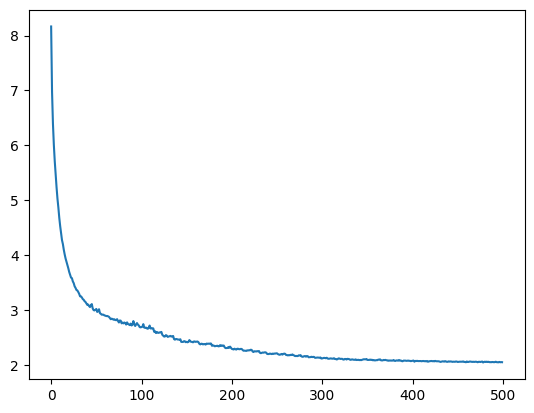

In [329]:
plt.plot(epoch_loss_avg)

In [330]:
input_data = []
for i in range(vocabulary_size):
    input_data.append(i)

In [331]:
input_data = torch.tensor(input_data)

In [332]:
import torch
import torch.nn as nn

# Assume you have a model called `my_model` with an embedding layer
embedding_layer = Transformer_Encoder.embedding  # Get the embedding layer

# Create a sample input data
#input_data = torch.tensor([1, 2, 3, 4, 5])  # example input data

# Pass the input data through the embedding layer
embeddings = embedding_layer(input_data.to(device))

# Now you have the embeddings for the input data
print(embeddings)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1219,  0.7792, -0.0055,  ...,  0.1000,  0.2809, -0.1728],
        [-1.5022,  0.7787, -0.0130,  ...,  0.7295, -0.1872, -0.2985],
        ...,
        [ 0.2404, -0.0337, -0.6876,  ...,  0.0806,  0.6288, -0.2208],
        [ 0.7329, -0.0153, -0.5254,  ...,  0.9261, -0.8152,  0.9353],
        [-2.8723,  2.6335, -2.3427,  ...,  5.2578, -2.1046, -2.9001]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)


In [333]:
!pip install hdbscan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan


embeddings = embeddings.cpu()
# Загрузка эмбеддингов слов
#embeddings = embeddings_np
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=3, perplexity=3)
embeddings_tsne = tsne.fit_transform(embeddings_np)



# Кластеризация с помощью HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=6)
clusters = clusterer.fit_predict(embeddings_tsne)

# Визуализация результатов
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=clusters)
plt.colorbar()
plt.show()

In [ ]:
# Получение меток классов
labels = clusterer.labels_

# Создание словаря для сопоставления слов и меток классов
word_clusters = dict(zip(vocabulary, labels))

In [ ]:
word_clusters

In [ ]:
# Создание DataFrame из словаря
df = pd.DataFrame(list(word_clusters.items()), columns=['Слово', 'Метка'])

# Запись DataFrame в Excel
df.to_excel('/content/word_clusters.xlsx', index=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan

embeddings = embeddings.cpu()
# Преобразование тензора embeddings в массив numpy
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)
embeddings_tsne = tsne.fit_transform(embeddings_np)

# Кластеризация с помощью HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=7)
clusters = clusterer.fit_predict(embeddings_tsne)

# Поиск индексов элементов, относящихся к кластеру -1
indices_to_keep = np.where(clusters != -1)[0]

# Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
filtered_embeddings_tsne = embeddings_tsne[indices_to_keep]

# Визуализация результатов
plt.figure(figsize=(10, 10))
plt.scatter(filtered_embeddings_tsne[:, 0], filtered_embeddings_tsne[:, 1], c=clusters[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan

embeddings = embeddings.cpu()
# Преобразование тензора embeddings в массив numpy
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)
embeddings_tsne = tsne.fit_transform(embeddings_np)

min_cluster_sizes = range(7, 22)  # Значения min_cluster_size

# Цикл для отображения карт с разными значениями min_cluster_size
for min_cluster_size in min_cluster_sizes:
    # Кластеризация с помощью HDBSCAN
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    clusters = clusterer.fit_predict(embeddings_tsne)

    # Поиск индексов элементов, относящихся к кластеру -1
    indices_to_keep = np.where(clusters != -1)[0]

    # Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
    filtered_embeddings_tsne = embeddings_tsne[indices_to_keep]

    # Визуализация результатов
    plt.figure(figsize=(10, 10))
    plt.scatter(filtered_embeddings_tsne[:, 0], filtered_embeddings_tsne[:, 1], c=clusters[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
    plt.colorbar()
    plt.title(f'min_cluster_size={min_cluster_size}')  # Заголовок с текущим значением min_cluster_size
    plt.show()

# DBSCAN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

# Преобразование тензора embeddings в массив numpy
embeddings_np = embeddings.detach().numpy()

# Уменьшение размерности с помощью t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)
embeddings_tsne = tsne.fit_transform(embeddings_np)

In [ ]:
# Параметры DBSCAN
eps = 3  # Радиус окрестности
min_samples = 7  # Минимальное количество точек в окрестности

# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(embeddings_tsne)

# Фильтрация элементов, присвоенных кластеру -1
indices_to_keep = np.where(clusters != -1)[0]
filtered_embeddings_tsne = embeddings_tsne[indices_to_keep]

# Визуализация результатов
plt.figure(figsize=(10, 10))
plt.scatter(filtered_embeddings_tsne[:, 0], filtered_embeddings_tsne[:, 1], c=clusters[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.title('DBSCAN Clustering')
plt.show()

#UMAP

In [ ]:
!pip install umap-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.cluster import KMeans

# Преобразование тензора embeddings в массив numpy
embeddings_np = embeddings.detach().numpy()

# Уменьшение размерности с помощью UMAP
umap = UMAP(n_components=2)
embeddings_umap = umap.fit_transform(embeddings_np)

# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters=90)
clusters = kmeans.fit_predict(embeddings_umap)

# Визуализация результатов
plt.figure(figsize=(10, 10))
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=clusters, cmap='viridis', s=10, alpha=0.8)
plt.colorbar()
plt.title('UMAP Clustering')
plt.show()